### Here are the steps for the activity:
1. Run the initial code: Execute the given Python code to see the model performance results.

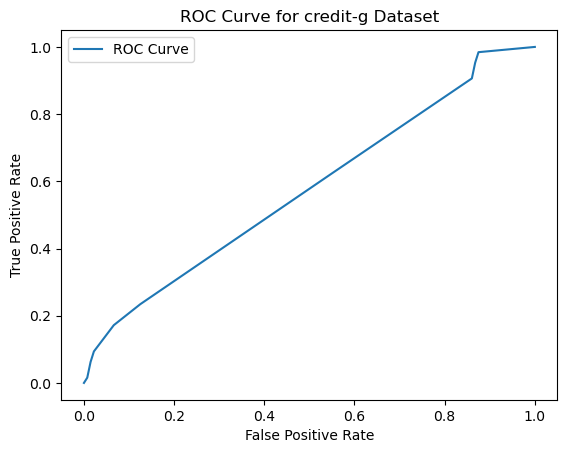

AUC: 0.5764016544117647
Confusion Matrix:
[[133   3]
 [ 58   6]]
Precision: 0.6666666666666666, Recall: 0.09375, Accuracy: 0.695


In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the credit-g dataset (data is already downloaded for you so we use the data_id to fetch the cached data from the file system)
data = fetch_openml(data_id=31)
df = data.frame
X = df[['duration', 'credit_amount', 'installment_commitment', 'age', 'existing_credits', 'num_dependents']]  # Features
y = df['class'].map({'good': 0, 'bad': 1}) # Target variable (default payment)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
 
# Create a decision tree model with the Gini criterion
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4)
dt_model.fit(X_train, y_train)

# Get predicted probabilities 
y_scores = dt_model.predict_proba(X_test)[:,1]
 
# Calculate and visualize ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for credit-g Dataset')
plt.legend()
plt.show()
 
# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_scores)
print(f'AUC: {auc}')
 
# Confusion Matrix
y_pred = dt_model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
 
# Other metrics
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')

2. Modify the `max_depth` parameter: change the value of this parameter from 4 to 15.  
 
3. Re-run the code: execute the modified code to see how this change affects the results. Take note of any changes in accuracy and other measures.
 
4. Observe and analyse: reflect on this change and analyse how changing the maximum depth of a tree impacts the accuracy measures (result of the model).